<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Práctica Redes Neuronales Convolucionales MultiClase Imagenes</h1> </div>

# **Práctica Redes Neuronales Convolucionales MultiClase Imagenes**

**Desarrollado por:** Michael Israel Lata Zambrano , John Michael Franco Naulaguari  

**Correo:** mlataz@est.ups.edu.ec, jfrancon@est.ups.edu.ec

---

## **Estructura de la práctica**

1. **Introducción**
   - Descripción del problema: clasificación multiclase usando redes neuronales convolucionales (CNN).
   - Objetivo: comprender y aplicar redes neuronales CNN para resolver un problema de clasificación de imágenes multiclase utilizando un dataset como Food-101.

2. **Fundamentos teóricos**
   - Introducción a redes neuronales convolucionales.
   - Arquitectura típica de una CNN para clasificación multiclase.
   - Métricas de evaluación: Accuracy, Precision, Recall, F1-Score.

3. **Dataset**
   - Food-101: 101,000 imágenes distribuidas en 101 clases.
   - 750 imágenes por clase para entrenamiento, 250 por clase para prueba.
   - Dimensiones típicas: 512x512 píxeles.
   - Etiquetas correspondientes a cada tipo de comida.

4. **Implementación**
   - Carga del dataset usando tensorflow_datasets.
   - Visualización de imágenes con sus etiquetas.
   - Construcción del modelo CNN con Keras.
   - Entrenamiento y optimización del modelo.
   - Evaluación en el conjunto de prueba.

5. **Evaluación**
   - Reporte de Accuracy, Precision, Recall y F1-Score.
   - Visualización en tabla.
   - Mapa de calor (heatmap) para evaluar fine-tuning.

6. **Predicción personalizada**
   - Implementación de función para predecir clase de:
   - Imagen del conjunto de test.
   - Imagen externa por PATH.
   - Imagen capturada desde cámara.

7. **Conclusiones**
   - Evaluación de desempeño del modelo entrenado.

   - Reflexión sobre utilidad de redes convolucionales en clasificación de imágenes.

   - Propuestas de mejora: aumento de datos, regularización, arquitecturas avanzadas.

8. **Referencias**
   - Fuentes en formato APA.



### 1. **Introducción**
La función XOR (o “exclusive OR”) es un problema clásico en el estudio de redes neuronales. A diferencia de funciones lógicas lineales como AND o OR, la función XOR **no es linealmente separable**, lo que significa que no puede resolverse con un perceptrón simple. Este problema fue históricamente importante porque demostró la necesidad de redes neuronales con **capas ocultas** para resolver problemas complejos.

En este proyecto, se implementa una red neuronal **desde cero** utilizando únicamente la biblioteca NumPy. El objetivo es que la red aprenda a predecir correctamente la salida de una función XOR de **4 entradas**, utilizando una **capa de 8 neuronas** y una **neurona de salida**. Esta implementación incluye el proceso completo de entrenamiento: propagación hacia adelante, retropropagación del error y ajuste de pesos.


### 2. **Fundamentos teóricos**

#### ¿Qué es una red neuronal?
Una red neuronal artificial es un modelo computacional inspirado en el cerebro humano. Está compuesta por capas de nodos (neuronas) que transforman entradas en salidas mediante funciones de activación y pesos ajustables.

#### Arquitectura utilizada:
- **Capa de entrada**: 4 neuronas (una por cada bit de entrada).
- **Capa**: 8 neuronas con función de activación sigmoide.
- **Capa de salida**: 1 neurona que predice si la suma de los unos es impar (1) o par (0).

#### ¿Por qué XOR?
La función XOR devuelve 1 si el número de unos en la entrada es impar, y 0 si es par. Es un problema no lineal, lo que lo convierte en un excelente caso de estudio para redes neuronales multicapa.


### 3. **Preparación del dataset**
- Se importan las librerías necesarias: `numpy` para cálculos numéricos y `pandas` para mostrar resultados en formato de tabla.
- Se define `X` como un conjunto de entradas binarias de 4 bits. Son todas las combinaciones posibles de 0s y 1s para 4 dígitos (16 combinaciones en total).
- La salida `y` representa si el número de unos en cada combinación es **impar (1)** o **par (0)**. Esta es una tarea de clasificación binaria.


1.1 Descripción del problema y del dataset
Problema:
Clasificación de imágenes multiclase mediante redes neuronales convolucionales (CNN). El objetivo es entrenar un modelo capaz de identificar correctamente el tipo de alimento presente en una imagen entre 101 posibles clases.

Dataset: Food-101

Nombre: Food-101

Fuente: ETH Zurich

Acceso: Disponible en sitio oficial y mediante TensorFlow Datasets (tfds).

Número total de imágenes: 101,000

Entrenamiento: 75,750 imágenes (750 por clase)

Prueba: 25,250 imágenes (250 por clase)

Número de clases: 101 (cada clase representa un platillo diferente como “spaghetti bolognese”, “sushi”, “apple pie”, etc.).

Dimensiones de las imágenes: varían, pero se redimensionan comúnmente a 224x224 o 299x299 px en modelos CNN estándar.

Formato de las etiquetas: string (nombre del platillo).

Ejemplo de clases:

pizza

pad_thai

guacamole

chicken_curry

ramen

etc.

In [1]:
import tarfile
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
print('importadas')

importadas


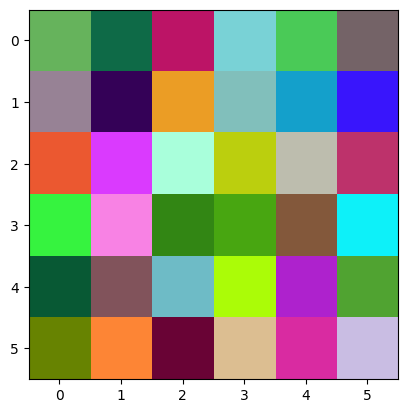

In [6]:
#RGB: rojo, verde, azul

#Librería para visualizar la imagen
import numpy as np
import matplotlib.pyplot as plt

#Fijamos la semilla del generador de valores aleatorios
np.random.seed(42)

#256 indica que se crean valores entre 0 y 255
A = np.random.randint(256, size=(6,6,3))

#Visualizamos el tensor A
plt.imshow(A)

#print(A)
#print(type(A))

In [7]:
# Se descomprime el archivo
import tarfile

with tarfile.open("food-101.tar.gz", "r:gz") as tar:
    tar.extractall()


 1.2 Análisis exploratorio y visualización de imágenes

Found 101000 files belonging to 101 classes.
Imagen 10
Forma (shape): (224, 224, 3)
Valor mínimo: 0.0, máximo: 255.0
Etiqueta ID: 0 - Clase: apple_pie


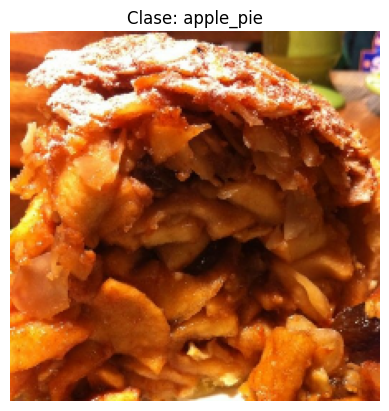

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Ruta al directorio donde están las imágenes
data_dir = "food-101\images"  # ← cambia esto a tu ruta

# Cargar el dataset (puedes ajustar el tamaño del lote)
ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(224, 224),
    batch_size=1,  # importante para acceder imagen por imagen
    shuffle=False
)

# Obtener los nombres de clases
class_names = ds.class_names

# Función para visualizar una imagen específica del dataset
def display_food101_image(dataset, sample_id):
    """
    Muestra las características de una imagen del dataset Food-101
    """
    i = 0
    for image, label in dataset:
        if i == sample_id:
            print(f"Imagen {sample_id}")
            print(f"Forma (shape): {image.numpy()[0].shape}")
            print(f"Valor mínimo: {np.min(image.numpy())}, máximo: {np.max(image.numpy())}")
            print(f"Etiqueta ID: {label.numpy()[0]} - Clase: {class_names[label.numpy()[0]]}")
            plt.imshow(image.numpy()[0].astype("uint8"))
            plt.axis("off")
            plt.title(f"Clase: {class_names[label.numpy()[0]]}")
            plt.show()
            break
        i += 1

# Usar la función con, por ejemplo, la imagen número 10
display_food101_image(ds, sample_id=10)


Found 101000 files belonging to 101 classes.
Imagen 9999
Forma (shape): (224, 224, 3)
Valor mínimo: 0.0, máximo: 255.0
Etiqueta ID: 9 - Clase: breakfast_burrito


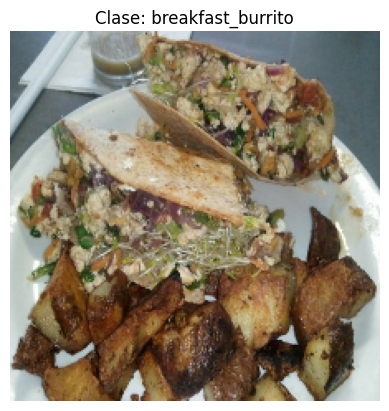

In [9]:
# Mostrar la imagen número 9999 del dataset (en orden sin shuffle)
sample_id = 9999

# Cargar dataset (sin mezclar)
ds = tf.keras.utils.image_dataset_from_directory(
    "food-101/images",  # reemplaza con tu ruta real
    image_size=(224, 224),
    batch_size=1,
    shuffle=False
)

# Usar función adaptada
display_food101_image(ds, sample_id=sample_id)


In [31]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def load_food101_data(path, image_size=(100, 100), batch_size=32):
    # Carga con división train/validation
    train_ds_raw = tf.keras.utils.image_dataset_from_directory(
        path,
        validation_split=0.2,
        subset="training",
        seed=123,
        image_size=image_size,
        batch_size=batch_size
    )

    val_ds = tf.keras.utils.image_dataset_from_directory(
        path,
        validation_split=0.2,
        subset="validation",
        seed=123,
        image_size=image_size,
        batch_size=batch_size
    )

    # Normalizar imágenes (de 0-255 a 0-1)
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    train_ds = train_ds_raw.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

    # Shuffle en entrenamiento para mejor generalización
    train_ds = train_ds.shuffle(1000)

    return train_ds, val_ds, train_ds_raw.class_names

# Ruta a tu dataset (ajusta esta ruta)
path = "food-101/images"

# Carga datos
train_ds, val_ds, class_names = load_food101_data(path, image_size=(100, 100), batch_size=32)

# Verifica las clases
print("Clases (ejemplo):", class_names[:10])
print("Número total clases:", len(class_names))






Found 101000 files belonging to 101 classes.
Using 80800 files for training.
Found 101000 files belonging to 101 classes.
Using 20200 files for validation.
Clases (ejemplo): ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']
Número total clases: 101


1.3 Desarrollar, entrenar y optimizar una red neuronal para clasificación multiclase
Vamos a hacer lo siguiente:

Construir un modelo CNN simple usando Keras.

Compilar el modelo con una función de pérdida adecuada para clasificación multiclase.

Entrenar el modelo sobre train_ds y val_ds.

Guardar el modelo entrenado como modeloRN.h5.

Arquitectura propuesta (simple pero efectiva):
Conv2D + MaxPooling (x2)

Flatten

Dense + Dropout

Softmax final

In [32]:
# Ya no es necesario esto:
# x_train = X_train / 255.0
# x_test = X_test / 255.0
# print("********* Normalización lista")

# En su lugar, puedes verificar así:
for images, labels in train_ds.take(1):
    print("********* Normalización lista")
    print('Valor normalizado de un píxel:', images[0, 1, 1, 1].numpy())  # Valor entre 0.0 y 1.0


********* Normalización lista
Valor normalizado de un píxel: 0.072836086


In [33]:
# Obtener el shape de las imágenes del dataset
for images, labels in train_ds.take(1):
    input_shape = images.shape[1:]  # Ignora el batch size
    print("Input shape:", input_shape)


Input shape: (100, 100, 3)


In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(len(class_names), activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [37]:
# Fase de entrenamiento usando datasets ya normalizados y preparados
epocas = 6

# Entrenamiento
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=6,
    verbose=1
)

Epoch 1/6
2525/2525 [==============================] - 101s 37ms/step - loss: 4.3226 - accuracy: 0.0842 - val_loss: 4.4739 - val_accuracy: 0.0809
Epoch 2/6
2525/2525 [==============================] - 100s 37ms/step - loss: 3.3793 - accuracy: 0.2036 - val_loss: 3.2417 - val_accuracy: 0.2313
Epoch 3/6
2525/2525 [==============================] - 101s 37ms/step - loss: 2.8691 - accuracy: 0.2967 - val_loss: 2.9592 - val_accuracy: 0.2988
Epoch 4/6
2525/2525 [==============================] - 100s 37ms/step - loss: 2.5094 - accuracy: 0.3725 - val_loss: 2.6647 - val_accuracy: 0.3528
Epoch 5/6
2525/2525 [==============================] - 100s 37ms/step - loss: 2.2346 - accuracy: 0.4318 - val_loss: 2.5101 - val_accuracy: 0.3879
Epoch 6/6
2525/2525 [==============================] - 100s 37ms/step - loss: 1.9878 - accuracy: 0.4838 - val_loss: 2.4038 - val_accuracy: 0.4154


In [ ]:
# Guardar el modelo entrenado
modelo.save("modeloRN.h5")
